# Rental Price Estimation

The goal of this project is to analyse and develop a machine learning model to predict the rental price of a house. Advanced regression techniques (random forest and gradient boosting) are deployed to predict the rental price.

### Data Overview

This data set consists of 8,111 records with 9 features and the original data set is available on DataCamp website.

#### Features

* id: ID of the property
* latitude: location (latitude) of the house
* logitude: location (logitude) of the house
* property_type: Type of property such as Apartment, Condominium, etc. 26 different types of property is listed. 
* room_type : type of rooms to be rented out. 4 different room types are listed. 
* bathrooms : number of bathrooms in the house/room range from 0 to 14 rooms. 
* bedrooms : number of bedrooms in the house/room range from 0 to 14 rooms.. 
* minimum_nights : mimum number of nights to be stayed. 
* price : rental price ranged from zero to 10,000. 

### Company Background
Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.

### Business Requirements
The product manager wants to develop a way to predict how much someone could earn from renting their property and the prediction price not to exceed more than 25 dollars off of the actual price. 


In [1]:
import pandas as pd
df = pd.read_csv("rentals.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


Step one: we check the data type of the variables using df.info() and it is observed that the price column has the wrong data type. The $ symbol is first removed and them the data type is converted using astype. 

In [2]:
df['price'] = df['price'].apply(lambda s: str(s).replace('$',''))
df['price'] = df['price'].apply(lambda s: str(s).replace(',',''))
df['price'] = df['price'].astype(float)

Step two: we check the number of missing values for each column and it is observed that bathrooms and bedrooms columns have missing values and missing values are replaced with 'median values'.

In [3]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.describe().round(1)

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8111.0,8111.0,8111.0,8111.0,8111.0,8111.0,8111.0
mean,20245608.3,37.8,-122.4,1.4,1.3,12345.3,225.4
std,12285654.2,0.0,0.0,0.9,0.9,1110357.2,412.3
min,958.0,37.7,-122.5,0.0,0.0,1.0,0.0
25%,8905668.0,37.8,-122.4,1.0,1.0,2.0,100.0
50%,21610572.0,37.8,-122.4,1.0,1.0,4.0,150.0
75%,31200253.5,37.8,-122.4,1.5,2.0,30.0,240.0
max,39354181.0,37.8,-122.4,14.0,14.0,100000000.0,10000.0


### EDA and data visualization. 

Looking at the statistical distribution, we observe that the number of nights variables has maximum value of 10,000,000 (10 millions) nights which is not possible whereas 75% of the data has less than 30 nights. Since, our project aims for the short term rental, we decided to focus on the records that rented out only for less than 1 year (365 nights and below). Then, we study the correlation between the number of nights stayed and price per night. 

In [4]:
idx = df[df['minimum_nights']>=365].index
df.drop(idx, axis = 0, inplace = True)
df.describe().round(1)

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8099.0,8099.0,8099.0,8099.0,8099.0,8099.0,8099.0
mean,20259939.9,37.8,-122.4,1.4,1.3,15.7,223.4
std,12283482.4,0.0,0.0,0.9,0.9,18.9,394.6
min,958.0,37.7,-122.5,0.0,0.0,1.0,0.0
25%,8916181.5,37.8,-122.4,1.0,1.0,2.0,100.0
50%,21619241.0,37.8,-122.4,1.0,1.0,4.0,150.0
75%,31213785.5,37.8,-122.4,1.5,2.0,30.0,240.0
max,39354181.0,37.8,-122.4,14.0,14.0,360.0,10000.0


Next, we study the price by different room_type. We can see that there are some outliers for the private room. The price is significantly higher that 75% of the data. To check if this is data error, we further study the private room type and observe that the price is high because of the property type. 

<Figure size 2000x400 with 0 Axes>

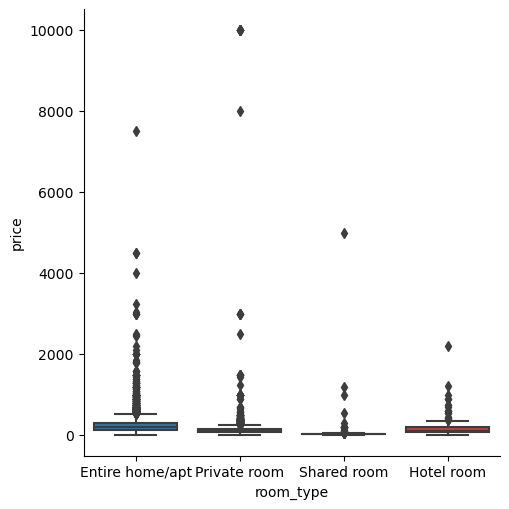

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
sns.catplot(data = df, x = 'room_type', y = 'price', kind = 'box')
plt.show()

In [6]:
df[df['room_type']=='Private room'].groupby('property_type').mean().round(2)

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
property_type,,,,,,,
Aparthotel,26389683.48,37.78,-122.41,3.42,0.94,15.73,130.58
Apartment,18094220.91,37.77,-122.43,1.33,1.04,15.65,132.69
Bed and breakfast,15736594.06,37.78,-122.43,2.44,0.88,1.41,188.47
Boutique hotel,27048577.91,37.79,-122.41,1.19,0.79,2.37,575.29
Bungalow,14477242.00,37.73,-122.42,1.00,1.33,10.67,116.67
Cabin,32786479.00,37.79,-122.42,1.50,1.00,2.00,155.00
Castle,19971951.00,37.73,-122.39,2.50,1.00,1.00,101.00
Condominium,19469084.21,37.77,-122.43,1.16,1.02,9.72,140.49
Cottage,387925.00,37.75,-122.42,1.00,1.00,11.67,109.67


Then, we study the correlation of the variables. 

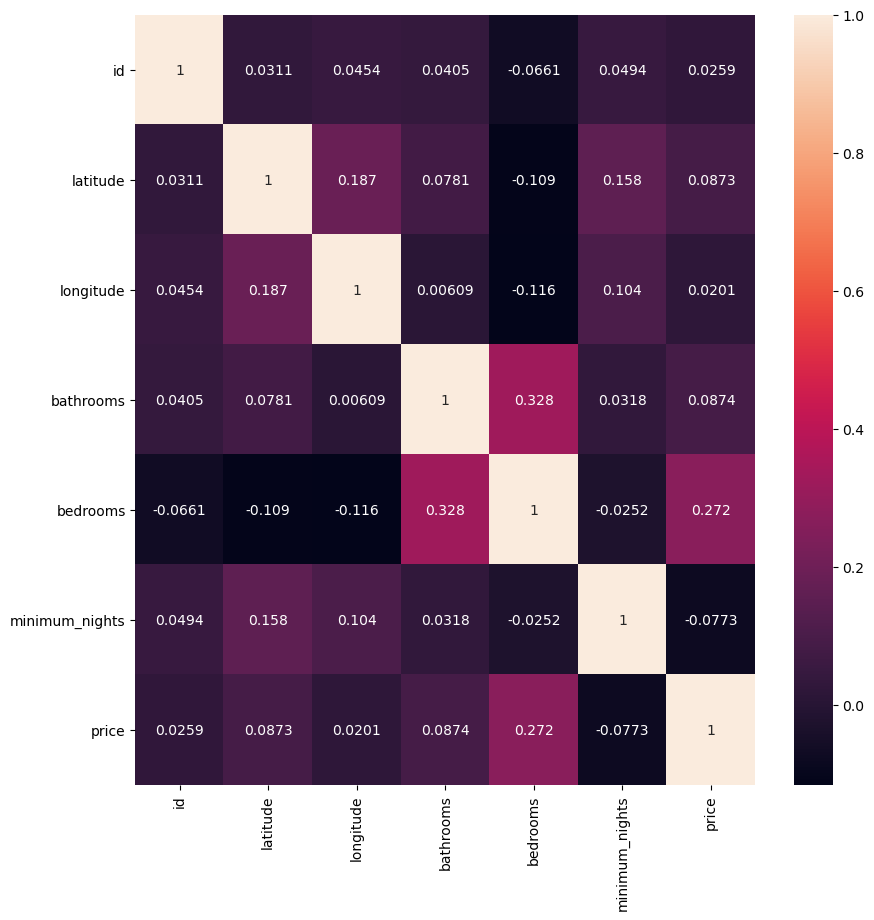

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, fmt = '.3g')
plt.show()

Step 3: Next, we identify the number of categorical variables and there are categorical variables, property type, room type and price. Taking price as target, we will not consider the property type and room type in our first model. The first model is to see the performance using only the numerical vlaues.  


In [8]:
catcol = [col for col in df.columns if df[col].dtype == 'object']
catcol.extend(['price', 'bathrooms'])

y = df['price'].values
X = df.drop(catcol, axis = 1).values


Step 4: we study the range of the feature variables to make sure that all the features are in similar scale. We use standardscaler to scale the features.

In [9]:
df.describe().round(2)

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8099.00,8099.00,8099.00,8099.00,8099.00,8099.00,8099.00
mean,20259939.92,37.77,-122.43,1.40,1.35,15.68,223.45
std,12283482.41,0.02,0.03,0.92,0.93,18.94,394.62
min,958.00,37.70,-122.51,0.00,0.00,1.00,0.00
25%,8916181.50,37.75,-122.44,1.00,1.00,2.00,100.00
50%,21619241.00,37.77,-122.42,1.00,1.00,4.00,150.00
75%,31213785.50,37.79,-122.41,1.50,2.00,30.00,240.00
max,39354181.00,37.83,-122.37,14.00,14.00,360.00,10000.00


Step 5: We split the data into training and testing size. We took 10 % as testing data and the rest for training. Random_state is also set at 42 to make sure that the splitting occurs at the same way on running the code at different times.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Step 5.1 : We use the Polynomial regression with degree 5 and Ridge Regression with alpha value 5 and R2 score is only 5%. More than 74% of the predicted values do not meet the business requirement (25$ from the actual price)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

steps = [('imp_mean', SimpleImputer()), 
         ('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree = 5)),
         ('lr', Ridge(5))]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

rscore = pipe.score(X_test,  y_test)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared = False)
more_than_25 = np.sum(np.abs(y_test-y_pred)>25)/len(y_test)
print(rscore, mse, more_than_25)

-205.27186408519879 5265.445249149013 0.7794238683127572


Step 5.2: We use the Gradient Boosting Regression to improve the accuracy. We achieve R2 score of 80% with the maximum depth parameter of 5 and min_sample_leaf of 3. But about 33% of the predicted values still do not meet the business requirement (25$ from the actual price)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_leaf= 3, learning_rate = 0.1,
                               loss = 'squared_error')
gbr.fit(X_train, y_train)
rscore = gbr.score(X_test, y_test)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred, squared = False)
less_than_25 = np.sum(np.abs(y_test-y_pred)<=25)/len(y_test)

print('testing data')
print('Rscore : {:.2f}%, Mean-squared error : {:.2f}'.format(rscore*100, mse))
print('{:.0f}% of records has error less than 25'.format(less_than_25*100))


testing data
Rscore : 59.01%, Mean-squared error : 234.72
28% of records has error less than 25


It is observed that the GBR method has improved the accuracy and the result can be further enhanced by tuning the hyperparameters. We re-visit the feature selection process. It is observed that room type have high impact on the prices and decided to include them in the modelling. 

Step 6.1 : the cateogrial values are encoded into numbers using one hot encoding method. 

In [13]:
df_r = pd.get_dummies(df['room_type'])
df_p = pd.get_dummies(df['property_type'])
df2 = df.join(df_r)
df2 = df2.join(df_p)
df2.drop(['room_type', 'property_type'], axis = 1, inplace = True)

In [14]:
X = df2.drop(['price'], axis = 1).values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training data: ', X_train.shape[0])
print('Testing data: ', X_test.shape[0])

Training data:  5669
Testing data:  2430


Step 6.2: Next, we use the Gradient Boosting method to estimate the rental price. We achieve 98% R score, average squared error of 58 and more than 70% of the testing data meets the busienss requirment. For the training data set, we achieve 99% R2 score, average squared error of 39  and about 80% of the training data meets the requirement. 

In [16]:
gbr = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_leaf= 3, learning_rate = 0.1,
                               loss = 'squared_error')
gbr.fit(X_train, y_train)
rscore = gbr.score(X_test, y_test)

y_pred1 = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred1, squared = False)
less_than_25 = np.sum(np.abs(y_test-y_pred1)<=25)/len(y_test)
print('testing data')
print('Rscore : {:.2f}%, Mean-squared error : {:.2f}'.format(rscore*100, mse))
print('{:.0f}% of records has error less than 25'.format(less_than_25*100))


rscore = gbr.score(X_train, y_train)
y_pred2 = gbr.predict(X_train)
mse = mean_squared_error(y_train, y_pred2, squared = False)
less_than_25 = np.sum(np.abs(y_train-y_pred2)<=25)/len(y_train)

print('training data')
print('Rscore : {:.2f}%, Mean-squared error : {:.2f}'.format(rscore*100, mse))
print('{:.0f}% of records has error less than 25'.format(less_than_25*100))

testing data
Rscore : 54.21%, Mean-squared error : 248.09
34% of records has error less than 25
training data
Rscore : 93.65%, Mean-squared error : 102.30
43% of records has error less than 25


<Figure size 2000x800 with 0 Axes>

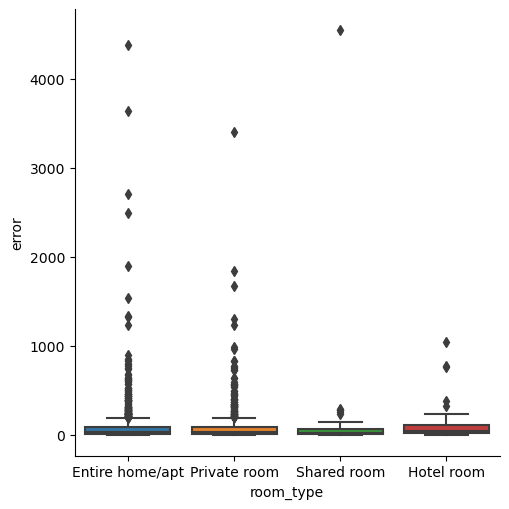

In [17]:
test_result = pd.DataFrame({'id': X_test[:,0], 'actual_price': y_test, 'predicted_price': y_pred1})
temp = df.loc[df['id'].isin(X_test[:,0]), ['property_type', 'room_type']].reset_index()
test_result = test_result.join(temp).drop('index', axis = 1)
test_result['error']=np.abs(test_result['actual_price'] - test_result['predicted_price'])
plt.figure(figsize = (20,8))
sns.catplot(data = test_result, x = 'room_type', y = 'error', kind = 'box')
plt.show()

In [18]:
by_roomtype = test_result.groupby('room_type').agg([np.mean, np.max, np.min])[['error']]
by_roomtype.sort_values(('error', 'mean'))

error                       
                       mean         amax      amin
room_type                                         
Entire home/apt   92.467780  4381.614120  0.030335
Private room      92.552102  3409.950621  0.030606
Hotel room       118.373402  1051.118189  1.529226
Shared room      120.991958  4557.645432  0.056337

<Figure size 3000x800 with 0 Axes>

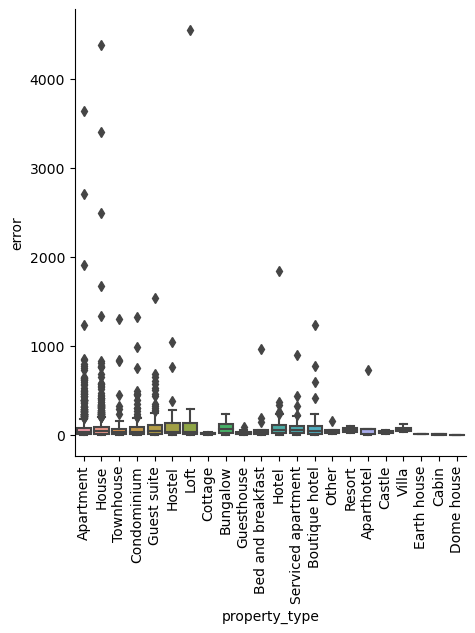

In [19]:
plt.figure(figsize = (30,8))
sns.catplot(data = test_result, x = 'property_type', y = 'error', kind = 'box')
plt.xticks(rotation = 90)
plt.show()

In [20]:
by_protype = test_result.groupby('property_type').agg([np.mean, np.max, np.min])[['error']]
by_protype.sort_values(('error', 'mean'))

error                        
                          mean         amax       amin
property_type                                         
Dome house            3.805791     3.805791   3.805791
Cabin                11.473610    19.196817   3.750403
Earth house          18.415587    18.415587  18.415587
Cottage              21.013038    38.858491   3.167586
Guesthouse           31.165039    97.568317   4.586106
Castle               35.562230    57.515381  10.216869
Other                53.538745   160.059479  16.425270
Resort               64.128339   110.195108  24.356685
Villa                72.008226   130.134408  32.965700
Condominium          77.373802  1329.852617   0.030335
Apartment            87.224617  3641.471400   0.063160
Boutique hotel       91.901328  1241.762539   0.030606
Bungalow             95.415933   243.627759   0.056337
Guest suite          96.059924  1541.442417   0.361775
House                98.921363  4381.614120   0.112714
Serviced apartment  110.301101   902.634748   5.770012
Bed and breakfast   116.085889   972.719471   3.596070
Townhouse           120.314314  1306.002449   0.325393
Hotel               120.435323  1850.003648   0.229506
Aparthotel          132.995159   738.779941   6.276627
Hostel              143.364243  1051.118189   1.334618
Loft                258.803999  4557.645432   0.112448

Remark : The model has larger error in predicting the rental price for luxury rooms such as House, Guest Suite, Townhouse and Villa. 
the result can be further enhanced by fine tuning the hyperparameters with Grid search methods. 